In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
df = pd.read_csv('cleaned_dataset.csv')

In [16]:
X = df.drop('LoanApproved', axis=1)
y = df['LoanApproved']

In [17]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [19]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CreditScore',
                                                   'AnnualIncome', 'LoanAmount',
                                                   'LoanDuration', 'Age',
                                                   'NumberOfDependents',
                                                   'MonthlyDebtPayments',
                                                   'CreditCardUtilizationRate',
                                                   'NumberOfOpenCreditLines',
                                                   'NumberOfCreditInquiries',
                                                   'DebtToIncomeRatio',
                                                   'BankruptcyHistory',
                                                   'PreviousLoanDefaults',
                                                   'InterestRat...
                                                   'PersonalLoanBalance',
                                                   'StudentLoanBalance',
                                                   'UtilityBillsPaymentHistory', ...]),
                                                 ('cat', OneHotEncoder(),
                                                  ['EmploymentStatus',
                                                   'MaritalStatus',
                                                   'EducationLevel',
                                                   'HomeOwnershipStatus',
                                                   'LoanPurpose',
                                                   'HealthInsuranceStatus',
                                                   'LifeInsuranceStatus',
                                                   'CarInsuranceStatus',
                                                   'HomeInsuranceStatus',
                                                   'EmployerType'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [22]:
y_pred = model.predict(X_test)

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.4925
              precision    recall  f1-score   support

           0       0.57      0.46      0.51       227
           1       0.43      0.54      0.48       173

    accuracy                           0.49       400
   macro avg       0.50      0.50      0.49       400
weighted avg       0.51      0.49      0.49       400



In [32]:
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    return result[1] < 0.05
    
if not check_stationarity(df['MonthlySavings']):
    df['Savings_diff'] = df['MonthlySavings'].diff().dropna()

ADF Statistic: -44.84057349654945
p-value: 0.0


In [33]:
# Arima

model = ARIMA(savings_data['MonthlySavings'], order=(1, 1, 1))  # Example values for p, d, q
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         MonthlySavings   No. Observations:                 2000
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -16357.760
Date:                Thu, 17 Oct 2024   AIC                          32721.520
Time:                        13:41:55   BIC                          32738.321
Sample:                             0   HQIC                         32727.689
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0021      0.023     -0.092      0.926      -0.046       0.042
ma.L1         -1.0000      0.369     -2.708      0.007      -1.724      -0.276
sigma2      7.474e+05   2.78e+05      2.693      0.0

In [34]:
predictions = model_fit.forecast(steps=12)
print('ARIMA Predictions for next 12 months:', predictions)

ARIMA Predictions for next 12 months: 2000    1478.603242
2001    1480.088391
2002    1480.085286
2003    1480.085293
2004    1480.085293
2005    1480.085293
2006    1480.085293
2007    1480.085293
2008    1480.085293
2009    1480.085293
2010    1480.085293
2011    1480.085293
Name: predicted_mean, dtype: float64


C:\Users\sambu\AppData\Local\Temp\ipykernel_12260\113736561.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=savings_data.index[-1], periods=13, freq='M')[1:], predictions, label='Predicted Savings', color='red')


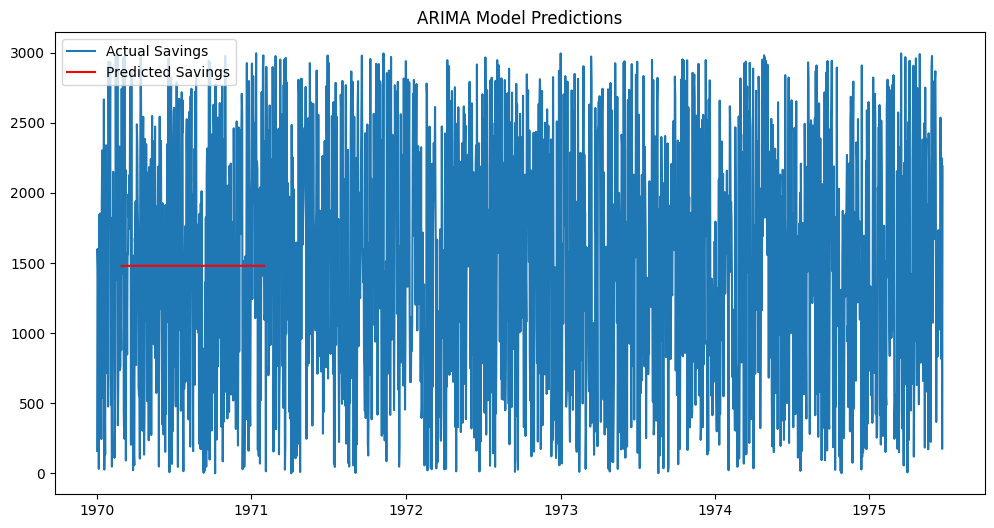

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(savings_data['MonthlySavings'], label='Actual Savings')
plt.plot(pd.date_range(start=savings_data.index[-1], periods=13, freq='M')[1:], predictions, label='Predicted Savings', color='red')
plt.title('ARIMA Model Predictions')
plt.legend()
plt.show()

In [45]:
X = df.drop('LoanAmount', axis=1)
y = df['LoanAmount']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Random Forest Regressor pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Print regression evaluation metrics
print("Random Forest Model Evaluation:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))

Random Forest Model Evaluation:
MAE: 11149.1635
RMSE: 12931.626526469146
R²: -0.01335421968779471


C:\Users\sambu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
